## Installing Packages

In [20]:
!pip install xgboost

In [21]:
!pip install imbalanced-learn

## Importing Libraries

In [22]:
import numpy as np # Library For Arrays

import pandas as pd # Library For Datasets



# Library For Graphs

import matplotlib.pyplot as plt 

import seaborn as sns



import imblearn # Library For Handling Imbalanced Class



from sklearn.model_selection import train_test_split # Importing 'train_test_split' Class For Training & Test Set

from imblearn.over_sampling import SMOTE, RandomOverSampler # Importing SMOTE Class To Handle Imbalanced Dataset

from collections import Counter # For Counting The Classification Distribution

from sklearn.decomposition import PCA



from sklearn.neighbors import KNeighborsClassifier # For KNN Model

from sklearn.ensemble import RandomForestClassifier # For Random Forest Model

from sklearn.svm import SVC # For SVM Model 





from sklearn.metrics import confusion_matrix, accuracy_score, f1_score # For Calculating Model Performance

from sklearn.model_selection import GridSearchCV # FOr Finding Best Parameter Setting For A Model

## Importing Dataset

In [23]:
Dataset = pd.read_csv('../Data/hmnist_8_8_RGB.csv') # Importing Dataset

display(Dataset) # Printing The Results

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0183,pixel0184,pixel0185,pixel0186,pixel0187,pixel0188,pixel0189,pixel0190,pixel0191,label
0,199,156,188,210,165,198,216,176,203,215,...,214,167,191,199,157,175,184,143,167,2
1,115,87,115,180,133,158,200,153,187,215,...,207,167,188,177,128,138,74,51,60,2
2,203,146,164,209,144,153,217,160,181,215,...,211,160,175,199,152,172,177,138,158,2
3,135,96,110,198,141,156,208,148,158,210,...,179,141,157,153,122,138,58,39,46,2
4,204,156,187,232,185,216,236,196,220,217,...,236,189,213,233,182,209,207,175,188,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,205,186,202,208,184,194,211,183,188,221,...,229,205,211,218,199,202,207,185,186,0
10011,103,89,88,156,133,134,183,157,159,205,...,199,172,173,179,154,152,99,84,80,0
10012,178,160,165,206,184,190,228,204,210,242,...,241,216,216,224,201,199,197,177,172,0
10013,166,124,142,179,138,156,186,138,156,188,...,195,178,187,191,168,177,186,159,169,0


### Seprating Independent & Dependent Variables

In [24]:
X = Dataset.iloc[:, :-1].values # Extracting IVs

display(X) # Printing The Result

array([[199, 156, 188, ..., 184, 143, 167],
       [115,  87, 115, ...,  74,  51,  60],
       [203, 146, 164, ..., 177, 138, 158],
       ...,
       [178, 160, 165, ..., 197, 177, 172],
       [166, 124, 142, ..., 186, 159, 169],
       [178, 145, 124, ..., 163, 105,  91]], dtype=int64)

In [25]:
Y = Dataset.iloc[:, -1].values # Extracting DVs

display(Y) # Printing The Result

array([2, 2, 2, ..., 0, 0, 6], dtype=int64)

### Training & Test Set

In [26]:
X_Train, X_Test, Y_Train, Y_Test= train_test_split(X, Y, test_size = 0.2, random_state = 0) # Spliting Into Train & Test Set

### Data Pre-Processing

* Class Distribution Graph (Before Sampling)

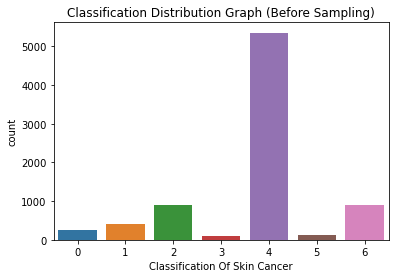

In [27]:
Before = pd.DataFrame(Y_Train) # Extracting Dependent Variable Of The Training Set

Before.columns = ['Classification Of Skin Cancer'] # Giving Cloumn Name

sns.countplot(x = 'Classification Of Skin Cancer', data = Before) # Plotting The Count Graph

plt.title('Classification Distribution Graph (Before Sampling)') # Giving Title To The Graph

plt.show() # Showing The Graph

* Class Distribution Table (Before Sampling)

#### Applying SMOTE (Synthetic Minority Over-Sampling Technique) To Balance The Data

In [28]:
Over = SMOTE() # Creating An Object Of The Class

X, Y = Over.fit_resample(X_Train, Y_Train)

* Class Distribution Graph (After SMOTE)

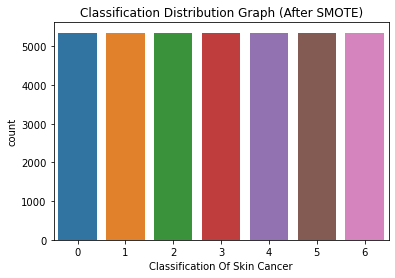

In [29]:
After_Smote = pd.DataFrame(Y) # Extracting Dependent Variable Of The Training Set

After_Smote.columns = ['Classification Of Skin Cancer'] # Giving Cloumn Name

sns.countplot(x = 'Classification Of Skin Cancer', data = After_Smote) # Plotting The Count Graph

plt.title('Classification Distribution Graph (After SMOTE)') # Giving Title To The Graph

plt.show() # Showing The Graph

#### Applying Random Over Sampling

In [30]:
Random_Over = RandomOverSampler()

X_Over, Y_Over = Random_Over.fit_resample(X_Train, Y_Train)

* Classification Distribution Graph (After Random Sampling)

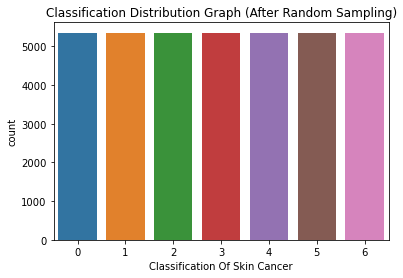

In [31]:
After_Random = pd.DataFrame(Y_Over) # Extracting Dependent Variable Of The Training Set

After_Random.columns = ['Classification Of Skin Cancer'] # Giving Cloumn Name

sns.countplot(x = 'Classification Of Skin Cancer', data = After_Random) # Plotting The Count Graph

plt.title('Classification Distribution Graph (After Random Sampling)') # Giving Title To The Graph

plt.show() # Showing The Graph

### xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx